In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import sys
sys.path.insert(0,"/home/wouter/Projects/Clustering/algorithms")

### K-Means vs FCM
-> overlapping clusters

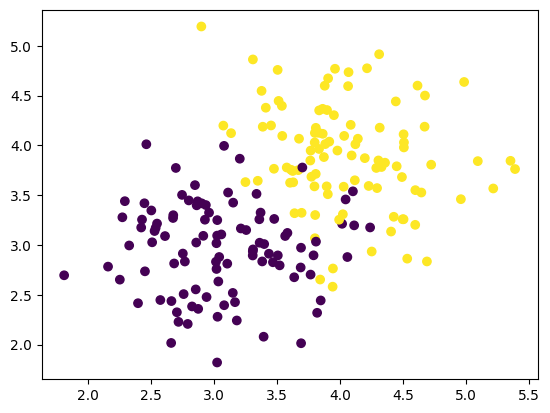

In [48]:
centers = [(3, 3), (4, 3.8)] 

X, y = make_blobs(
    n_samples=200, 
    centers=centers, 
    cluster_std=0.5, 
    random_state=4
)
plt.scatter(X[:,0], X[:,1],c=y);

K-Means results

In [49]:
from k_means import KMeans

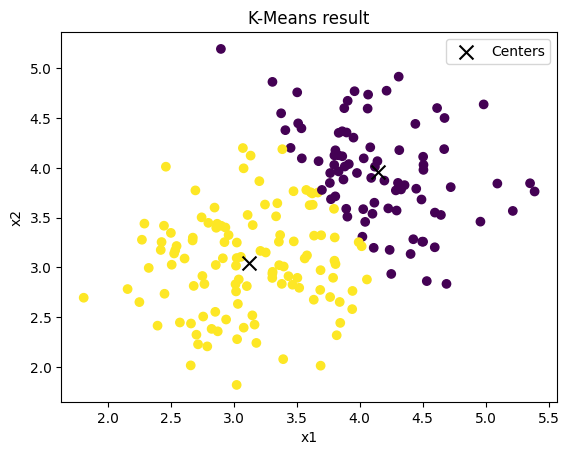

In [50]:
# init params
k = 2
max_iter=100
n_init=10

# load class & predict
KM_clustering = KMeans(k,max_iter,n_init)
labels = KM_clustering.fit_predict(X)
V_KM = KM_clustering.centroids_
plt.scatter(X[:,0],X[:,1],c=labels);
plt.scatter(V_KM[:, 0], V_KM[:, 1], marker='x', c='black', s=100, label='Centers')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("K-Means result")
plt.show()

FCM Results

In [51]:
from fuzzy_c_means import FCM

In [52]:
# load class & predict
FCM_clustering = FCM(c=2,m=2)
U_FCM = FCM_clustering.fit_predict(X)
V_FCM = FCM_clustering.V_

converged


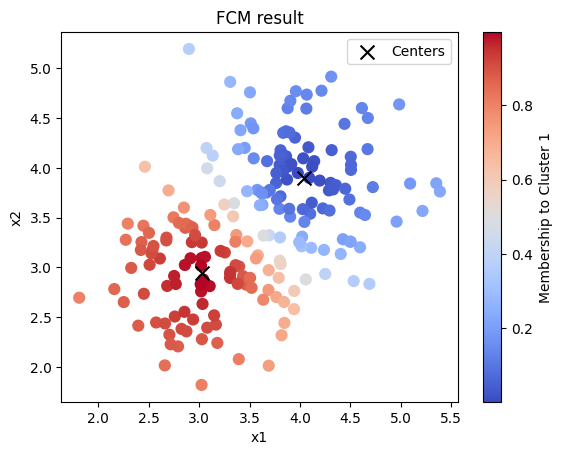

In [53]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=U_FCM[0], cmap='coolwarm', s=60)

cbar = plt.colorbar(scatter)
cbar.set_label('Membership to Cluster 1')

plt.scatter(V_FCM[:, 0], V_FCM[:, 1], marker='x', c='black', s=100, label='Centers')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("FCM result")
plt.show()

Put together

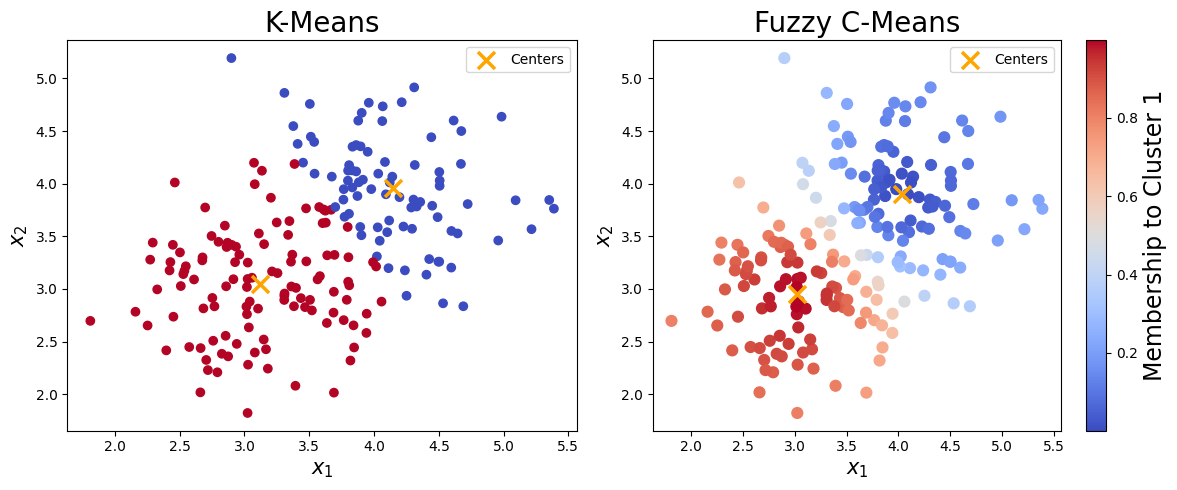

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-MEANS PLOT
ax1 = axes[0]
ax1.scatter(X[:,0], X[:,1], c=labels, cmap="coolwarm")
ax1.scatter(V_KM[:, 0], V_KM[:, 1], marker='x', c='orange', s=150, linewidths=2.5,label='Centers')
ax1.legend()
ax1.set_xlabel('$x_1$',fontsize=15)
ax1.set_ylabel('$x_2$',fontsize=15)
ax1.set_title("K-Means",fontsize=20)

# FCM PLOT
ax2 = axes[1]
scatter = ax2.scatter(X[:, 0], X[:, 1], c=U_FCM[0], cmap='coolwarm', s=60)
ax2.scatter(V_FCM[:, 0], V_FCM[:, 1], marker='x', c='orange', s=150, linewidths=2.5, label='Centers')

cbar = fig.colorbar(scatter, ax=ax2)
cbar.set_label('Membership to Cluster 1',fontsize=17)

ax2.legend()
ax2.set_xlabel('$x_1$',fontsize=15)
ax2.set_ylabel('$x_2$',fontsize=15)
ax2.set_title("Fuzzy C-Means",fontsize=20)

plt.tight_layout()
plt.show()

### FCM vs PCM
-> datasets with outliers and noise

Data

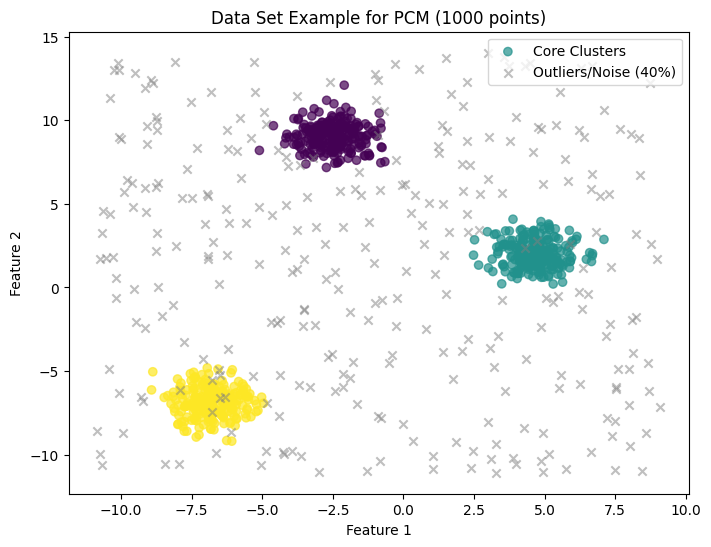

In [55]:
N_SAMPLES = 1000
N_CLUSTERS = 3
NOISE_RATIO = 0.3


# 1. Generate the core clusters (60% of data)
n_clustered = int(N_SAMPLES * (1 - NOISE_RATIO))
X_clustered, y_clustered = make_blobs(
    n_samples=n_clustered,
    centers=N_CLUSTERS,
    cluster_std=0.8, # Small standard deviation for tight clusters
    random_state=42
)

# 2. Generate noise points (40% of data)
n_noise = N_SAMPLES - n_clustered
# Define the bounds of the clustered data to scatter the noise within/around it
x_min, x_max = X_clustered[:, 0].min(), X_clustered[:, 0].max()
y_min, y_max = X_clustered[:, 1].min(), X_clustered[:, 1].max()

# Scatter noise points uniformly across the data space
X_noise = np.column_stack([
    np.random.uniform(x_min - 2, x_max + 2, n_noise),
    np.random.uniform(y_min - 2, y_max + 2, n_noise)
])

# Combine the data
X_combined = np.vstack([X_clustered, X_noise])
y_labels = np.hstack([y_clustered, np.full(n_noise, -1)]) # -1 for noise points

# Scatter plot of the generated data
plt.figure(figsize=(8, 6))
# Plot clusters in different colors
plt.scatter(X_clustered[:, 0], X_clustered[:, 1], c=y_clustered, marker='o', label='Core Clusters', alpha=0.7)
# Plot noise in a distinct color
plt.scatter(X_noise[:, 0], X_noise[:, 1], c='gray', marker='x', label='Outliers/Noise (40%)', alpha=0.5)
plt.title(f'Data Set Example for PCM ({N_SAMPLES} points)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

FCM

In [56]:
# Load class & predict
FCM_clustering = FCM(c=3,m=2)
U_FCM = FCM_clustering.fit_predict(X_combined)
V_FCM = FCM_clustering.V_

# Plot
V_FCM

converged


array([[-6.35692431, -6.67822926],
       [-2.76941184,  8.82128985],
       [ 4.57985608,  1.72332753]])

Visualize FCM results

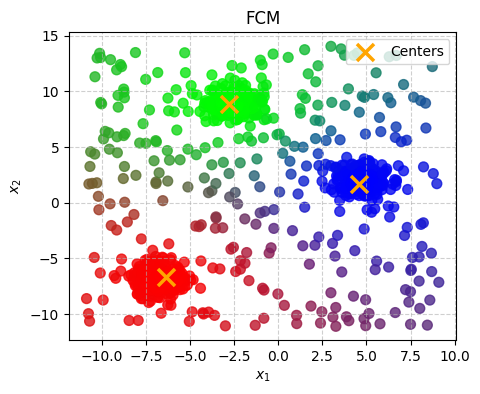

In [ ]:
rgb_colors = U_FCM.T

# create figure
plt.figure(figsize=(5, 4))

# plot points with color based on memberships
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=rgb_colors, alpha=0.8, s=50)

# plot centroids
plt.scatter(V_FCM[:, 0], V_FCM[:, 1], marker='x', c='orange', s=150, linewidths=2.5, label='Centers')

# settings
plt.title('FCM')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

PCM

In [58]:
from possibilistic_c_means import PCM

converged
converged


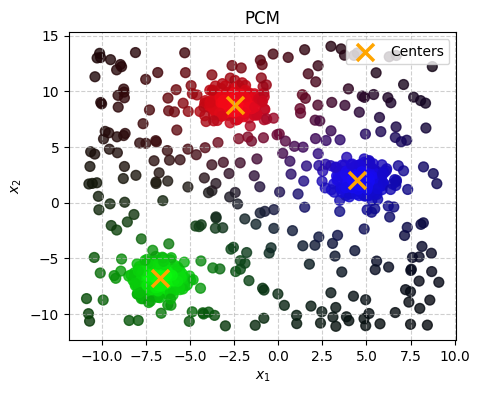

In [59]:
PCM_clustering = PCM(c=3,m=2)
U_PCM = PCM_clustering.fit_predict(X_combined)
V_PCM = PCM_clustering.V_
rgb_colors = U_PCM.T

# Create the scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=rgb_colors, alpha=0.8, s=50)

# Plot the centroids for context
plt.scatter(V_PCM[:, 0], V_PCM[:, 1], marker='x', c='orange', s=150, linewidths=2.5, label='Centers')

# Add titles and labels for clarity
plt.title('PCM')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

COMPARE FCM vs PCM

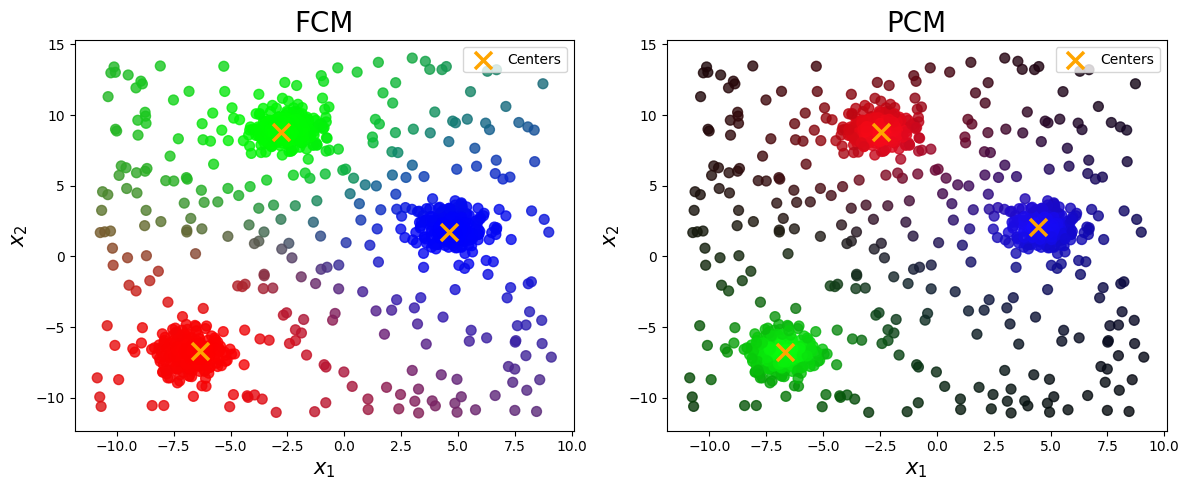

In [70]:
# FCM Plot setup
rgb_colors_fcm = U_FCM.T

# PCM Plot setup
rgb_colors_pcm = U_PCM.T

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# FCM Plot
axes[0].scatter(X_combined[:, 0], X_combined[:, 1], c=rgb_colors_fcm, alpha=0.8, s=50)
axes[0].scatter(V_FCM[:, 0], V_FCM[:, 1], marker='x', c='orange', s=150, linewidths=2.5, label='Centers')
axes[0].set_title('FCM',fontsize=20)
axes[0].set_xlabel('$x_1$',fontsize=15)
axes[0].set_ylabel('$x_2$',fontsize=15)
axes[0].legend()
# axes[0].grid(True, linestyle='--', alpha=0.6)

# PCM Plot
axes[1].scatter(X_combined[:, 0], X_combined[:, 1], c=rgb_colors_pcm, alpha=0.8, s=50)
axes[1].scatter(V_PCM[:, 0], V_PCM[:, 1], marker='x', c='orange', s=150, linewidths=2.5, label='Centers')
axes[1].set_title('PCM',fontsize=20)
axes[1].set_xlabel('$x_1$',fontsize=15)
axes[1].set_ylabel('$x_2$',fontsize=15)
axes[1].legend()
# axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

EPCM

In [60]:
from enhanced_possibilistic_c_means import EPCM

In [61]:
EPCM_clustering = EPCM(c=3,m=2)
U_I_EPCM = EPCM_clustering.fit_predict(X_combined)
V_I_EPCM = EPCM_clustering.V_I_

converged
converged


In [62]:
def label_points(U_I, theta):
    membership_sums = np.sum(U_I, axis=0)
    
    labels = np.argmax(U_I, axis=0)
    
    outlier_mask = membership_sums <= theta
    labels[outlier_mask] = -1
    
    return labels

EPCM_labels = label_points(U_I_EPCM,0.45)

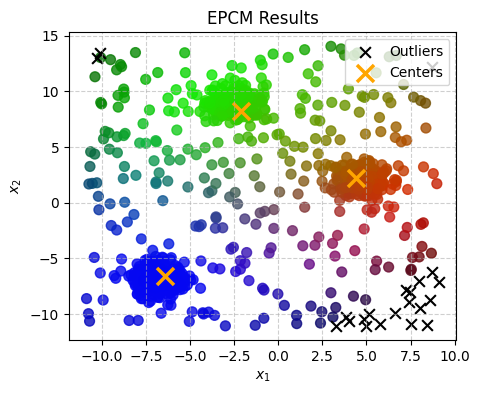

In [63]:
def plot_epcm_results(X, U_I, V_I, labels):
    outlier_mask = labels == -1
    inlier_mask = ~outlier_mask

    plt.figure(figsize=(5, 4))

    if np.any(inlier_mask):
        rgb_colors = U_I[:, inlier_mask].T
        plt.scatter(X[inlier_mask, 0], X[inlier_mask, 1], c=rgb_colors, alpha=0.8, s=50)

    if np.any(outlier_mask):
        plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1], marker='x', c='black', s=60, linewidths=1.5, label='Outliers')

    plt.scatter(V_I[:, 0], V_I[:, 1], marker='x', c='orange', s=150, linewidths=2.5, label='Centers')

    plt.title('EPCM Results')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_epcm_results(X_combined,U_I_EPCM,V_I_EPCM,EPCM_labels)

In [64]:
U_I_EPCM.shape

(3, 1000)

In [65]:
np.sum(U_I_EPCM, axis=0)

array([1.00000004, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.00000003, 1.        , 1.        , 1.        ,
       1.00000001, 1.00000001, 1.00000001, 1.        , 1.00000003,
       1.        , 1.        , 1.        , 1.00000001, 1.00000002,
       1.        , 1.        , 1.        , 1.        , 1.00000003,
       1.        , 1.00000004, 1.00000001, 1.        , 1.        ,
       1.00000002, 1.00000001, 1.        , 1.        , 1.00000003,
       1.        , 1.00000001, 1.00000003, 1.00000003, 1.        ,
       1.        , 1.00000001, 1.00000003, 1.        , 1.        ,
       1.00000003, 1.00000003, 1.        , 1.        , 1.00000003,
       1.        , 1.        , 1.        , 1.00000001, 1.00000003,
       1.00000001, 1.        , 1.00000001, 1.00000003, 1.00000003,
       1.00000002, 1.        , 1.00000001, 1.00000003, 1.        ,
       1.00000001, 1.        , 1.00000001, 1.        , 1.        ,
       1.        , 1.00000003, 1.        , 1.00000001, 1.     

In [11]:
len("""The selection of a clustering algorithm involves a clear trade-off between practical simplicity and expressive power. K-Means is most useful as a simple and computationally efficient baseline, but its rigid, hard-partitioning model is unsuitable for datasets where partial membership is meaningful or where clusters overlap.

When graded membership is needed, fuzzy and probabilistic models are well-suited, but their performance degrades in the presence of significant noise or outliers. Possibilistic approaches are the superior choice when outlier handling is critical and an absolute measure of belonging is needed, though this comes at the cost of careful parameterization and potential instability. Finally, Evidential C-Means offers the most nuanced representation of uncertainty, capable of distinguishing ambiguity from ignorance. Its high complexity makes it a specialized tool, best justified when analyzing complex data structures where such detailed uncertainty states are meaningful and need to be explicitly modeled.""".replace(" ","").replace("\n",""))

888